In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [106]:
df = pd.read_csv('collage.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'collage.csv'

# EDA - Exploratory Data Analysis

In [102]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0.0,8,8,4,No
1,CLG0061,97,5.52,5.37,8,0.0,7,8,0,No
2,CLG0036,109,5.36,5.83,9,0.0,3,1,1,No
3,CLG0055,122,5.47,5.75,6,1.0,1,6,1,No
4,CLG0004,96,7.91,7.69,7,0.0,8,10,2,No


In [101]:
np.shape(df)

(10000, 10)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.00
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.00
CGPA,10000.0,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.00
Internship_Experience,10000.0,0.396400,0.489174,0.00,0.00,0.00,1.00,1.00
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.00
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.00
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  float64
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 781.4+ KB


# Clean the Data

In [8]:
df['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
df['Internship_Experience']=encoder.fit_transform(df[['Internship_Experience']])
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0.0,8,8,4,No
1,CLG0061,97,5.52,5.37,8,0.0,7,8,0,No
2,CLG0036,109,5.36,5.83,9,0.0,3,1,1,No
3,CLG0055,122,5.47,5.75,6,1.0,1,6,1,No
4,CLG0004,96,7.91,7.69,7,0.0,8,10,2,No


In [11]:
X = df.drop(columns=['College_ID','Placement'])
y=df['Placement']

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=10)

# Model Training

In [13]:
model  = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)

In [70]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
y_pred2 = model2.predict(X_test)

# Model Evaluation

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.92      0.95      0.94      1652
         Yes       0.73      0.60      0.66       348

    accuracy                           0.89      2000
   macro avg       0.82      0.78      0.80      2000
weighted avg       0.89      0.89      0.89      2000



In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.92      0.95      0.94      1652
         Yes       0.73      0.60      0.66       348

    accuracy                           0.89      2000
   macro avg       0.82      0.78      0.80      2000
weighted avg       0.89      0.89      0.89      2000



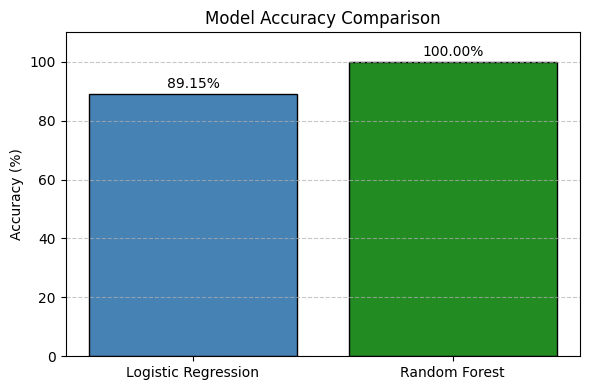

In [91]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test,y_pred)*100, accuracy_score(y_test,y_pred2)*100]
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['steelblue', 'forestgreen'], edgecolor='black')
plt.ylim(0, 110) 
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

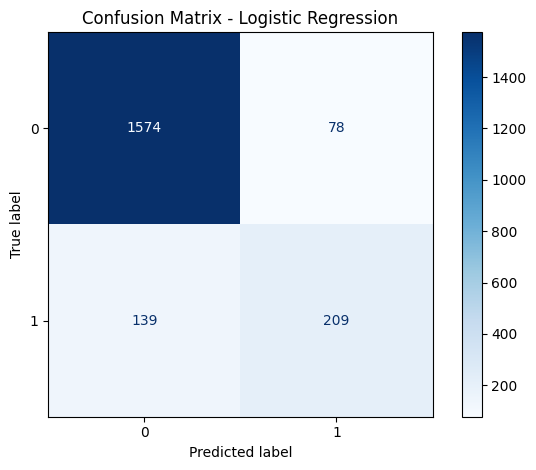

''

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()
""

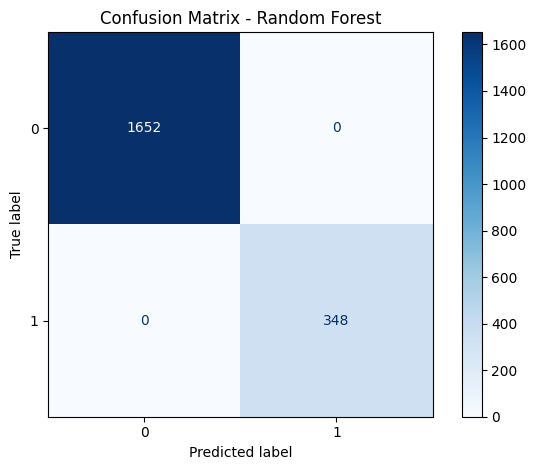

''

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()
""

# Analysis / Insights

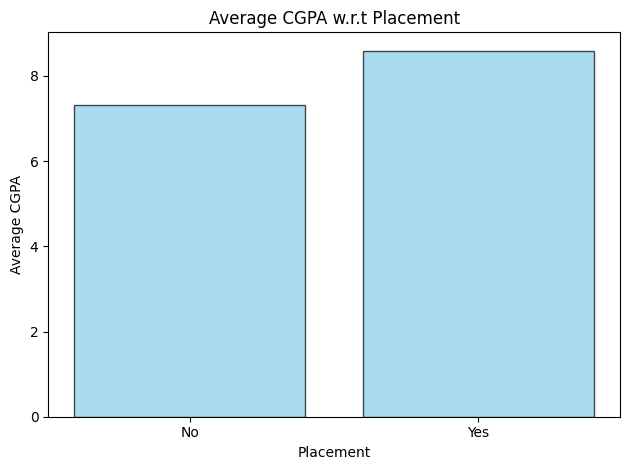

In [94]:
avg_cgpa = df.groupby('Placement')['CGPA'].mean()
plt.bar(avg_cgpa.index, avg_cgpa.values, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Average CGPA w.r.t Placement')
plt.xlabel('Placement')
plt.ylabel('Average CGPA')
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

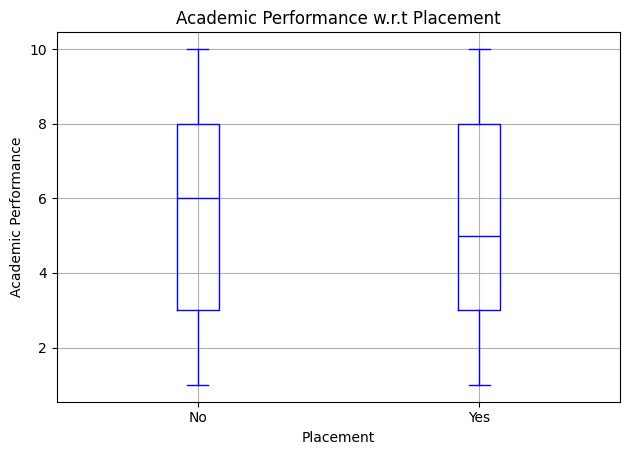

In [95]:
plt.figure(figsize=(6, 4))
df.boxplot(column='Academic_Performance', by='Placement', color='blue')
plt.title('Academic Performance w.r.t Placement')
plt.suptitle('')
plt.xlabel('Placement')
plt.ylabel('Academic Performance')
plt.tight_layout()
plt.show()

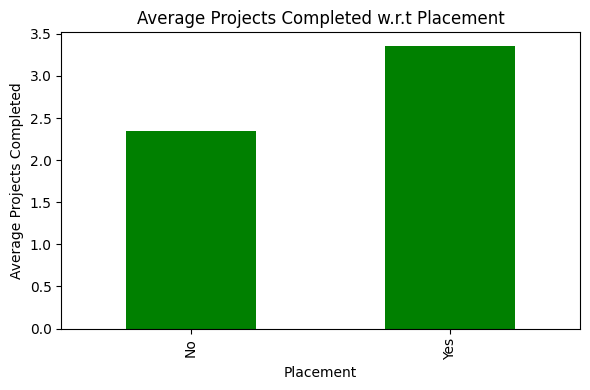

In [96]:
plt.figure(figsize=(6, 4))
placements = df.groupby('Placement')['Projects_Completed'].mean()
placements.plot(kind='bar', color='green')
plt.title('Average Projects Completed w.r.t Placement')
plt.xlabel('Placement')
plt.ylabel('Average Projects Completed')
plt.tight_layout()
plt.show()

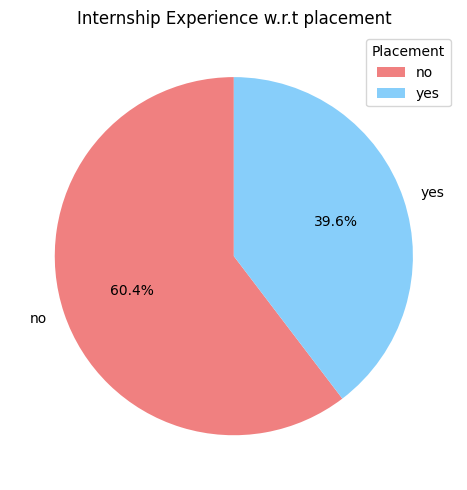

In [97]:
plt.figure(figsize=(5, 5))
intern_counts = df['Internship_Experience'].replace({'Yes': 1.0, 'No': 0.0}).value_counts()
plt.pie(intern_counts, labels=['no','yes'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Internship Experience w.r.t placement')
plt.legend(title="Placement")
plt.tight_layout()
plt.show()
